# **Estudio de Startups en el mundo según su valuación de mercado**

#### por Franco Luis Blardone

-------------------------

Este repositorio contiene un análisis de datos de distintas Startups en el mundo, centrando su análisis en país de origen, valuación e industria a la cual pertenecen. Los datos obtenidos corresponden al año 2021.

Nos centraremos en aquellas startups denominadas **"Unicornios"** que son aquellas que alcanzan una valuación de 1 Billón de USD sin ser listadas en los mercados de acciones.

## Objetivos

El objetivo es estudiar las relaciones entre el surgimiento de estas compañías y responder los siguientes interrogantes:
- Qué industria tiene mayor cantidad de startups
- Qué país concentra la mayor cantidad de startups
- Qué valuación total significan estas startups
- Cantidad de estas compañías que tiene el potencial de sobrevivir en el mercado.

## Tabla de contenidos

1. Carga de datos
2. Exploración
3. Limpieza de datos
4. Presentación de los datos
5. Conclusiones
6. Referencias

# Como hacer lista de contenido linkeada?

https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook
--------------------------


## 1. Carga de datos

Este Dataset fue descargado en formato .csv de la web pública Kaggle.

Link to Dataset: https://www.kaggle.com/khaiid/startups-by-valuation

In [2]:
#importamos librerias

import pandas as pd

import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt

#habilitamos matplotlib

%matplotlib inline

from matplotlib import style

style.use('seaborn-pastel')


In [3]:
#definimos el path al Dataset e importamos los datos al Dataframe

from os import path

archivo = "data\Startups.csv"

print(f"El Dataset se encuentra en el destino {path.abspath(archivo)}")

path = "data\Startups.csv"

df = pd.read_csv(path)


El Dataset se encuentra en el destino C:\Users\Lenovo\Documents\GitHub\Proyecto-Final---Startups\data\Startups.csv


## 2. Exploración

In [4]:
#forma del Dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
print()
      
#informacion del Dataframe
df.info()

#visualizacion rapida random
df.sample(5)


El dataset tiene 250 filas y 5 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         250 non-null    object 
 1   Valuation       250 non-null    float64
 2   Valuation_date  250 non-null    object 
 3   Industry        233 non-null    object 
 4   Country         250 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.9+ KB


,Company,Valuation,Valuation_date,Industry,Country
33,ZongMu Technology,11.0,June-21,Self-driving cars,China
120,Relativity Space,4.2,June-21,Aerospace,United States
54,Tempus,8.1,December-20,Health,United States
198,Wefox,3.0,June-21,NaN,Germany
223,Sourcegraph,2.6,July-21,NaN,United States


In [5]:
#visualizacion de los extremos del Dataframe
df.head(5)

,Company,Valuation,Valuation_date,Industry,Country
0,ByteDance,140.0,April-21,Internet,China
1,SpaceX,100.0,October-21,Aerospace,United States
2,Stripe,95.0,March-21,Financial services,United States / Ireland
3,Klarna,45.6,June-21,Fintech,Sweden
4,Canva,40.0,September-21,Graphic design,Australia


In [6]:
df.tail(5)

,Company,Valuation,Valuation_date,Industry,Country
245,Bitso,2.20,May-21,Cryptocurrency,Mexico
246,Gympass,2.20,June-21,NaN,Brazil / United States
247,Kurly,2.20,July-21,E-commerce,South Korea
248,Addepar,2.17,June-21,Fintech,United States
249,Eightfold.ai,2.10,June-21,Artificial intelligence,United States


In [186]:
#df.Valuation.unique()

#hay algún error en los números? parece que hay espacios vacíos. Investigar las series A,B o C de las startups

In [148]:
#df.Industry.unique()

In [9]:
df.nunique()

Company           250
Valuation         104
Valuation_date     50
Industry           81
Country            53
dtype: int64

Para cerrar la seccion se pone una breve descripcion de lo que encontramos en los datos

## 3. Limpieza de datos

In [10]:
#hacer una copia del df

clean_df = df.copy()

Desde aquí en adelante trabajaremos con la copia del dataframe

In [11]:
#renombramos la columna Industry

clean_df= clean_df.rename(columns={"Industry":"Industry_Field"})

clean_df

clean_df.columns


Index(['Company', 'Valuation', 'Valuation_date', 'Industry_Field', 'Country'], dtype='object')

In [12]:
#Renombramos la columna Valuation especificando que está valuado en Billones

clean_df = clean_df.rename(columns={'Valuation' : 'Valuation_Billions'})

#clean_df.columns

In [13]:
clean_df['Valuation_Billions'] = clean_df['Valuation_Billions']

In [14]:
clean_df.Valuation_Billions.unique()

#como eliminar esos espacios vacios? con replace?

array([140.  , 100.  ,  95.  ,  45.6 ,  40.  ,  39.  ,  38.  ,  33.  ,
        30.  ,  28.7 ,  25.  ,  21.  ,  20.  ,  18.  ,  17.  ,  16.5 ,
        15.5 ,  15.  ,  13.4 ,  13.  ,  12.4 ,  12.3 ,  12.  ,  11.75,
        11.  ,  10.  ,   9.6 ,   9.5 ,   9.  ,   8.7 ,   8.6 ,   8.5 ,
         8.3 ,   8.1 ,   8.  ,   7.75,   7.6 ,   7.56,   7.5 ,   7.4 ,
         7.3 ,   7.25,   7.  ,   6.8 ,   6.6 ,   6.5 ,   6.3 ,   6.04,
         6.  ,   5.77,   5.7 ,   5.6 ,   5.5 ,   5.4 ,   5.3 ,   5.25,
         5.2 ,   5.1 ,   5.  ,   4.9 ,   4.75,   4.6 ,   4.5 ,   4.4 ,
         4.3 ,   4.2 ,   4.15,   4.1 ,   4.05,   4.  ,   3.95,   3.8 ,
         3.75,   3.7 ,   3.6 ,   3.55,   3.5 ,   3.35,   3.33,   3.3 ,
         3.4 ,   3.2 ,   3.15,   3.1 ,   3.  ,   2.9 ,   2.85,   2.8 ,
         2.78,   2.75,   2.7 ,   2.63,   2.6 ,   2.56,   2.5 ,   2.45,
         2.4 ,   2.39,   2.33,   2.3 ,   2.25,   2.2 ,   2.17,   2.1 ])

In [15]:
#verificamos si hay valores nulos 

clean_df.isnull().sum()


Company                0
Valuation_Billions     0
Valuation_date         0
Industry_Field        17
Country                0
dtype: int64

In [16]:
print(f"Encontramos {clean_df.isnull().Industry_Field.sum()} valores NaN que deben ser reemplazados")


Encontramos 17 valores NaN que deben ser reemplazados


In [17]:
#Cambiamos los valores NaN por "Undetermined" ya que hace referencia al tipo de industria

clean_df['Industry_Field'] = clean_df.Industry_Field.fillna('Undetermined')

In [188]:
#Eliminamos espacios en blanco en categoría Country

clean_df['Country'] = clean_df['Country'].str.strip()

#clean_df.Country.unique()

In [19]:
clean_df.Industry_Field.value_counts()

Fintech                      24
Software                     23
Undetermined                 17
E-commerce                   15
Artificial intelligence      10
                             ..
Software industry             1
Data analytics                1
Human resource management     1
Consumer electronics          1
Collaborative software        1
Name: Industry_Field, Length: 82, dtype: int64

------------------

## 4. Presentación de los datos

## ¿Qué país concentra la mayor cantidad de startups?

In [189]:
#hacer esto en una función?

industry_country = clean_df.groupby('Country')['Country'].count().sort_values(ascending = False).head(10)

industry_country.to_frame()


,Country
Country,
United States,114
India,27
China,26
United Kingdom,11
Germany,6
Canada,6
South Korea,6
France,5
Israel / United States,3


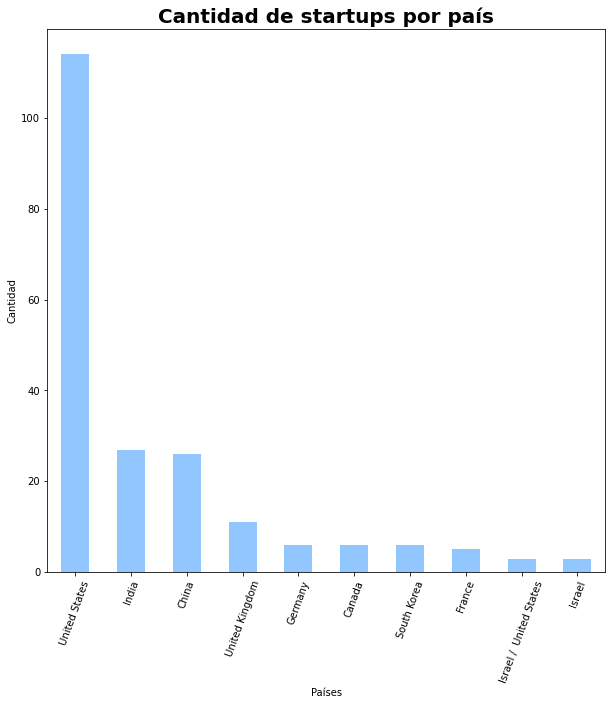

In [196]:
industry_country.plot.bar(figsize=(10,10));

plt.title('Cantidad de startups por país', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('Países');
plt.ylabel('Cantidad');
plt.xticks(rotation=70);

In [149]:
#crear nuevo dataframe?

country_valuation = clean_df.groupby(['Country', 'Industry_Field'])['Valuation_Billions'].sum().sort_values(ascending = False).head(10)

valuation_df = country_valuation.to_frame()

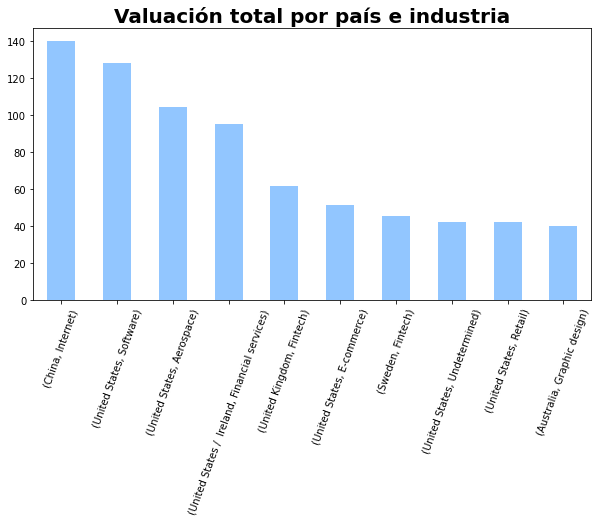

In [195]:
country_valuation_plot = country_valuation.plot.bar(figsize=(10,5));

plt.title('Valuación total por país e industria', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('');
plt.ylabel('');
plt.xticks(rotation=70);

# IDEA: HACER UN GRAFICO QUE REUNA LA VALUACION TOTAL MÁXIMA POR PAIS Y QUE MUESTRE A QUE INDUSTRIA PERTENECE. GRAFICO DE BARRAS ACUMULADO

stacked bar chart

hue - seaborn

In [128]:
total_valuation =  clean_df['Valuation_Billions'].sum()

print(f"La valuación total de las startups al año 2021 es: {total_valuation} billones de USD")

La valuación total de las startups al año 2021 es: 1955.21 billones de USD


In [129]:
top_valuation =  clean_df['Valuation_Billions'].head(10).sum()

print(f"La valuación del top 10 startups  al año 2021 es: {top_valuation} billones de USD")

La valuación del top 10 startups  al año 2021 es: 590.6 billones de USD


In [143]:
clean_df['Valuation_Percentage'] = round((clean_df['Valuation_Billions']/top_valuation)*100,2)


#clean_df.head(10)

In [144]:
total_percentage = clean_df.groupby(['Country','Industry_Field', 'Valuation_Percentage'])['Valuation_Billions'].sum().sort_values(ascending = False).head(10)

total_percentage.to_frame()

Valuation_Billions
Country                  Industry_Field     Valuation_Percentage                    
China                    Internet           23.70                              140.0
United States            Aerospace          16.93                              100.0
United States /  Ireland Financial services 16.09                               95.0
Sweden                   Fintech            7.72                                45.6
Australia                Graphic design     6.77                                40.0
United States            Retail             6.60                                39.0
                         Software           6.43                                38.0
United Kingdom           Fintech            5.59                                33.0
United Kingdom /  UAE    Internet           5.08                                30.0
Brazil                   Financial services 5.08                                30.0

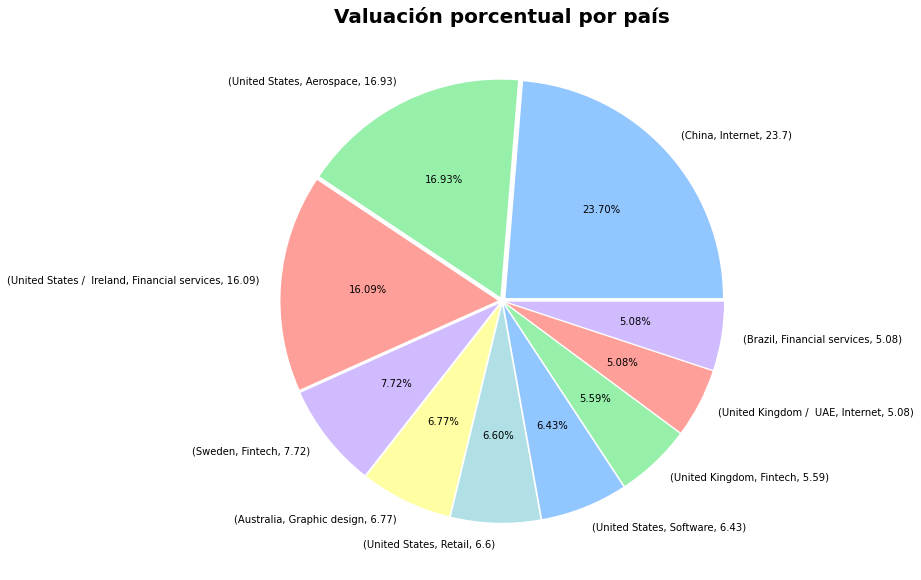

In [190]:
total_percentage_plot = total_percentage.plot.pie(x='Total_Valuation', y='Valuation_Percentage',figsize=(10,10), autopct='%.2f%%',  explode=[0.02, 0.02, 0.02,0.02, 0.02, 0.02,0.02, 0.02,0.02,0.02]);

plt.title('Valuación porcentual por país', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('');
plt.ylabel('');

In [146]:
industry_type = clean_df.Industry_Field.value_counts().head(10)

new_df = industry_type.to_frame().reset_index()

new_df

,index,Industry_Field
0,Fintech,24
1,Software,23
2,Undetermined,17
3,E-commerce,15
4,Artificial intelligence,10
5,Financial services,9
6,Cryptocurrency,9
7,Cybersecurity,8
8,Transportation,6
9,Marketplace,6


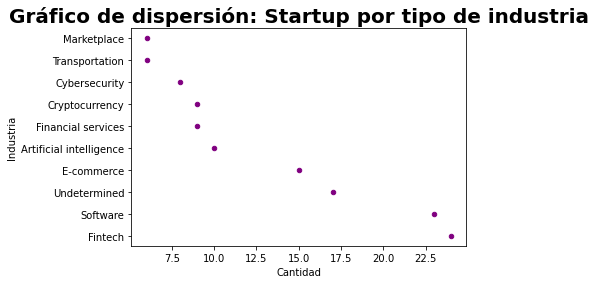

In [194]:
new_df.plot(kind='scatter', x='Industry_Field', y ='index', c = 'purple', alpha = 1);

plt.title('Gráfico de dispersión: Startup por tipo de industria', fontdict = {'fontsize':20, 'fontweight':'bold'});
plt.xlabel('Cantidad');
plt.ylabel('Industria');

#Usar scale para mostrar puntos más grandes en tipo de startup? cloud map? Bubble chart. 
# https://datavizpyr.com/how-to-make-bubble-plot-with-seaborn-scatterplot-in-python/

In [2]:
#conclusion: lo que encontramos

## 5. Conclusiones

In [3]:
#Lo que encontramos, lo que llamó la atencion, como se podria seguir el análisis

## 6. Referencias